In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1st Part
Find the Moving Avg for Passengers dataset

In [2]:
train = pd.read_excel('Passenger.xlsx')
print(train)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [3]:
train['SMA_3'] = train['#Passengers'].rolling(window=3).mean()
print(train['SMA_3'].tail(10))

134    409.000000
135    423.666667
136    450.666667
137    489.333333
138    543.000000
139    587.666667
140    578.666667
141    525.000000
142    453.000000
143    427.666667
Name: SMA_3, dtype: float64


In [4]:
train['SMA_5'] = train['#Passengers'].rolling(window=5).mean()
print(train['SMA_5'].tail(10))

134    398.8
135    418.6
136    432.0
137    455.6
138    501.8
139    539.2
140    548.6
141    546.4
142    517.4
143    479.4
Name: SMA_5, dtype: float64


In [5]:
train['SMA_7'] = train['#Passengers'].rolling(window=7).mean()
print(train['SMA_7'].tail(10))

134    409.142857
135    408.857143
136    418.142857
137    442.857143
138    473.857143
139    500.857143
140    517.571429
141    523.571429
142    513.428571
143    507.714286
Name: SMA_7, dtype: float64


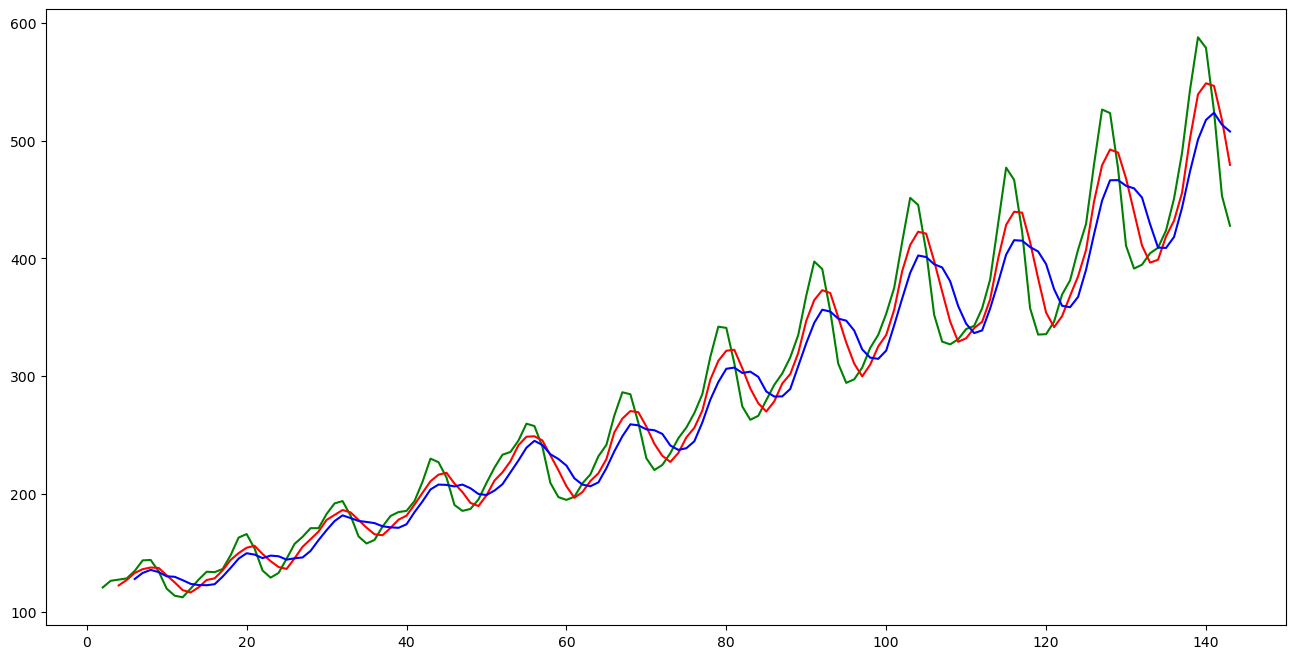

In [6]:
#figure(figsize=16,8)
train['SMA_3'].plot(color='green',figsize=(16,8))
train['SMA_5'].plot(color='red', figsize=(16,8))
train['SMA_7'].plot(color='blue',figsize=(16,8))
plt.show()

# 2nd Part

In [7]:
#Augmented Dickey - Fuller statistic to check stationarity
#Null Hypothesis: The time series data is non-stationary
#Alternative Hypothesis: The time series data is stationary
train=train.dropna()
t = train["#Passengers"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#If the p-value is less than or equal to 0.05, you reject H0 and conclude that the time series is stationary.
#If the p-value is greater than 0.05 , you fail to reject H0 and conclude that the time series is not stationary.

ADF Statistic: 0.740325
p-value: 0.990609


#### 1st Order Difference 

<Axes: >

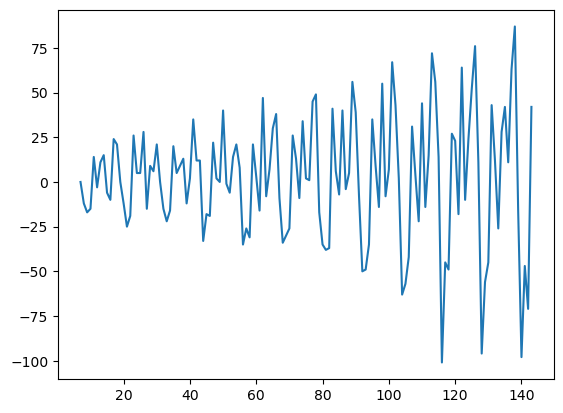

In [8]:
train['#Passengers_diff']= train['#Passengers']-train['#Passengers'].shift(1)
train['#Passengers_diff'].plot()

In [9]:
result = adfuller(train['#Passengers_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.741599
p-value: 0.067112


#### Still the p-value is >0.05 so lets try Power transformation

#### Power Transformation

ADF Statistic: -2.836694
p-value: 0.053220


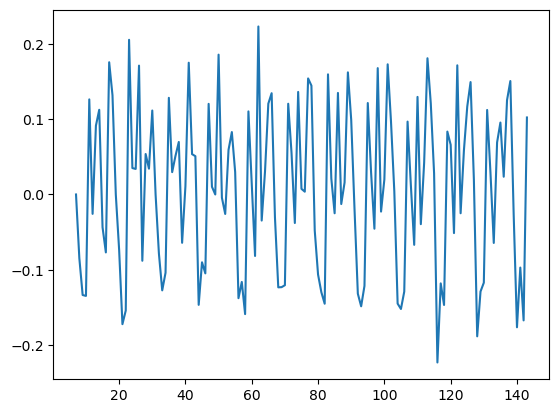

In [10]:
train['Passengers_log'] = np.log(train['#Passengers'])
train['Passengers_log_diff'] = train['Passengers_log'] - train['Passengers_log'].shift(1)
train['Passengers_log_diff'].plot()
result = adfuller(train['Passengers_log_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#### Here also the p-value > 0.05 we fail to apply ACF or PACF since it is not stationary.

In [12]:
train['Passengers_log'] = np.log(train['#Passengers'])
result = adfuller(train['Passengers_log'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.845348
p-value: 0.358191


#### Using Log Transformation we can see p-value is less than 0.05.

In [14]:
Auto_corr = acf(train['Passengers_log'].dropna())
Auto_corr

array([1.        , 0.95605575, 0.90093062, 0.84684618, 0.79642767,
       0.7595556 , 0.7305122 , 0.70224864, 0.68468541, 0.6916852 ,
       0.70706367, 0.72793994, 0.73830134, 0.69887897, 0.64740617,
       0.59932672, 0.55123819, 0.51321974, 0.48412079, 0.45884864,
       0.44275157, 0.4529643 ])

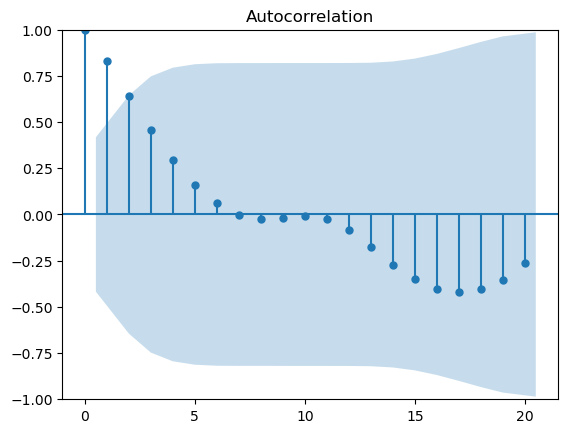

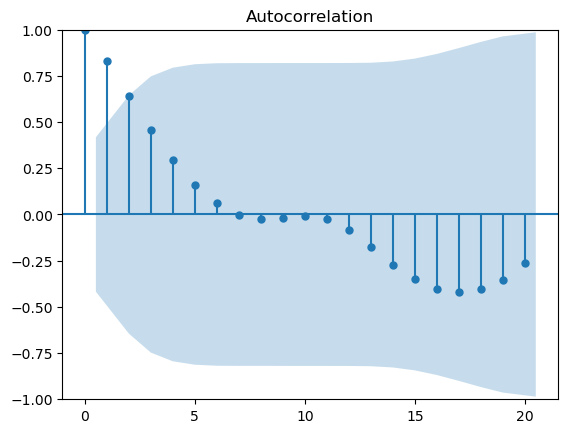

In [20]:
plot_acf(Auto_corr,lags=20)

In [22]:
partial_acf= pacf(train['Passengers_log'].dropna())
partial_acf

array([ 1.        ,  0.96303426, -0.18266922,  0.00535986,  0.0116272 ,
        0.1529004 ,  0.03516591, -0.02827626,  0.15769547,  0.36394322,
        0.08940873,  0.12254753, -0.08685247, -0.70676717, -0.12673945,
        0.16706324,  0.07428474,  0.29137093,  0.3169558 ,  0.2576981 ,
       -0.09880972, -0.25819329])

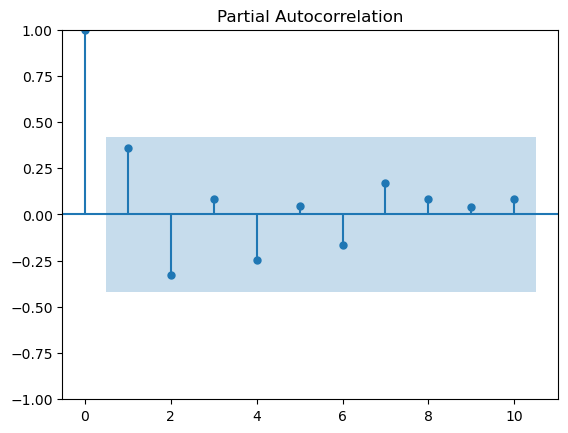

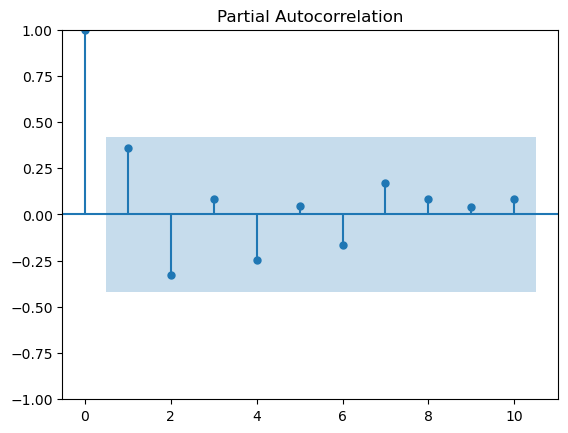

In [24]:
plot_pacf(partial_acf, lags=10)

1. Check for stationarity before applying ACF
2. Choose the model accordingly